In [2]:
import pandas as pd
import numpy as np


In [3]:
# 1)	Read the data and display the first 100 rows from the data

data = pd.read_excel("/content/TWTR.xlsx")
print(data.head(100))

         Date       Open       High        Low      Close  Adj Close  \
0  2013-11-07  45.099998  50.090000  44.000000  44.900002  44.900002   
1  2013-11-08  45.930000  46.939999  40.685001  41.650002  41.650002   
2  2013-11-11  40.500000  43.000000  39.400002  42.900002  42.900002   
3  2013-11-12  43.660000  43.779999  41.830002  41.900002  41.900002   
4  2013-11-13  41.029999  42.869999  40.759998  42.599998  42.599998   
..        ...        ...        ...        ...        ...        ...   
95 2014-03-27  45.090000  46.400002  43.310001  46.320000  46.320000   
96 2014-03-28  46.650002  47.340000  45.700001  47.299999  47.299999   
97 2014-03-31  47.549999  47.750000  46.430000  46.669998  46.669998   
98 2014-04-01  46.709999  47.590000  46.180000  46.980000  46.980000   
99 2014-04-02  47.400002  47.439999  45.509998  45.730000  45.730000   

         Volume  
0   117701670.0  
1    27925307.0  
2    16113941.0  
3     6316755.0  
4     8688325.0  
..          ...  
95   1550

In [4]:
# 2)	Give the column insights

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2264 non-null   datetime64[ns]
 1   Open       2259 non-null   float64       
 2   High       2259 non-null   float64       
 3   Low        2259 non-null   float64       
 4   Close      2259 non-null   float64       
 5   Adj Close  2259 non-null   float64       
 6   Volume     2259 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 123.9 KB
None


In [5]:
# 3)	Check whether this dataset contains any null values or not if it is there then remove the null values from it

print(data.isnull().sum())

Date         0
Open         5
High         5
Low          5
Close        5
Adj Close    5
Volume       5
dtype: int64


In [6]:
print(data.dropna(inplace=True))

None


In [8]:
# 4)	Find the statistical description of the data.

print(data.describe())

                                Date         Open         High          Low  \
count                           2259  2259.000000  2259.000000  2259.000000   
mean   2018-05-04 20:18:48.286852608    36.020286    36.699881    35.339465   
min              2013-11-07 00:00:00    13.950000    14.220000    13.725000   
25%              2016-02-06 12:00:00    25.550000    26.215001    24.912501   
50%              2018-05-04 00:00:00    35.419998    36.099998    34.820000   
75%              2020-08-01 12:00:00    44.205000    45.015000    43.327501   
max              2022-10-27 00:00:00    78.360001    80.750000    76.050003   
std                              NaN    14.118463    14.372057    13.828724   

             Close    Adj Close        Volume  
count  2259.000000  2259.000000  2.259000e+03  
mean     36.003625    36.003625  2.175186e+07  
min      14.010000    14.010000  0.000000e+00  
25%      25.410000    25.410000  1.233530e+07  
50%      35.490002    35.490002  1.691305e+07  


In [11]:
# 5)	Find the missing values in the data

missing_values = data.isnull().sum()

print(missing_values)

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
# 6)	Give me the Z-test O/R T-test over High, low, and close columns and see if the null hypothesis gets rejected or accepted

import numpy as np
from numpy import random
import statistics as st
from statsmodels.stats import weightstats


high = data['High']
print("Data:", high)

high_mean = st.mean(high)
print("Mean of Data:", high_mean)

high_stdv = st.stdev(high)
print("Standard Deviation of Data:", high_stdv)

ztest, pval = weightstats.ztest(high, value=30)

print("Z-Test Score:", ztest)
print("P-Value:", pval)

if pval < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Accept the Null Hypothesis")

Data: 0       50.090000
1       46.939999
2       43.000000
3       43.779999
4       42.869999
          ...    
2254    50.750000
2255    51.860001
2256    53.180000
2257    53.500000
2258    54.000000
Name: High, Length: 2259, dtype: float64
Mean of Data: 36.69988069278442
Standard Deviation of Data: 14.372056692309659
Z-Test Score: 22.15676048174423
P-Value: 8.978177265940086e-109
Reject Null Hypothesis


In [ ]:
import pandas as pd
from scipy.stats import ttest_1samp
import statistics as st


high = data['High']
print("Data:", high)

high_mean = st.mean(high)
print("Mean of Data:", high_mean)

high_stdv = st.stdev(high)
print("Standard Deviation of Data:", high_stdv)

# t-test
t_test, pval = ttest_1samp(high, 50)  # Testing against a hypothetical value of 50
print("T-Test Score:", t_test)
print("P-Value:", pval)

#on p-value
if pval < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Accept the Null Hypothesis")

Data: 0       50.090000
1       46.939999
2       43.000000
3       43.779999
4       42.869999
          ...    
2254    50.750000
2255    51.860001
2256    53.180000
2257    53.500000
2258    54.000000
Name: High, Length: 2259, dtype: float64
Mean of Data: 36.69988069278442
Standard Deviation of Data: 14.372056692309659
T-Test Score: -43.984000817502285
P-Value: 9.208373050426324e-306
Reject Null Hypothesis


In [ ]:
# 7)	By using ANOVA find the Fvalue and Pvalue from the data and see its Acceptance and rejection of the Null hypothesis.

import pandas as pd
import scipy.stats
import io

grap1 = data['High']
grap2 = data['Low']
print("High column data:", grap1.head())
print("Low column data:", grap2.head())

# Performing the t-test
fval, pval = scipy.stats.f_oneway(grap1, grap2)
print("T-Test Statistic:", fval)
print("P-Value:", pval)

# on p-value
if pval < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Accept the Null Hypothesis")

High column data: 0    50.090000
1    46.939999
2    43.000000
3    43.779999
4    42.869999
Name: High, dtype: float64
Low column data: 0    44.000000
1    40.685001
2    39.400002
3    41.830002
4    40.759998
Name: Low, dtype: float64
T-Test Statistic: 10.510084066032649
P-Value: 0.0011958722702637046
Reject Null Hypothesis


In [ ]:
# 8)	Check if the data is dependent or independent by using the chi-square method.

import pandas as pd
import scipy
from scipy import stats

data = {'High':data['High'],'Low':data['Low']}
print(data)

chisq , pval = scipy.stats.chisquare(data['Low'])
alpha = 0.05
print("Chi-Square=",chisq)
print("p-Value=",pval)

if pval<alpha:
  print("Dependent")
else:
  print("Independent")

{'High': 0       50.090000
1       46.939999
2       43.000000
3       43.779999
4       42.869999
          ...    
2259          NaN
2260          NaN
2261          NaN
2262          NaN
2263          NaN
Name: High, Length: 2264, dtype: float64, 'Low': 0       44.000000
1       40.685001
2       39.400002
3       41.830002
4       40.759998
          ...    
2259          NaN
2260          NaN
2261          NaN
2262          NaN
2263          NaN
Name: Low, Length: 2264, dtype: float64}
Chi-Square= nan
p-Value= nan
Independent


In [15]:
# 9)	Calculate the Z-score for the given data and by using the Gaussian distribution approach

import numpy as np

mean = np.mean(data['High'])
std_dev = np.std(data['High'])

zscores = [(x - mean) / std_dev for x in data['High']]

print("Z-scores:", zscores)

Z-scores: [0.9318836061840754, 0.7126596975679947, 0.43845598121252427, 0.49273990985147814, 0.42940857857868414, 0.6242741436693354, 0.5964363350468574, 0.5045711768614098, 0.3619017639186659, 0.35146239429934534, 0.4029627369416861, 0.38834760555566344, 0.3090094542908447, 0.267948481267824, 0.3271043291533943, 0.3396314056688921, 0.3688611116819811, 0.34102302468002477, 0.5024831219908849, 0.6715986549501047, 0.6333215463031755, 0.9144848888014396, 1.1051749705048668, 1.1949521434146588, 1.334141882475745, 1.580507790208737, 1.638271671108827, 1.4392302746566041, 1.4127841546401283, 1.4649803067880356, 1.6389674806143935, 1.968847022999429, 2.37806520381337, 2.6467014002012665, 2.404511045450368, 1.8797656595952035, 1.9848540517760622, 2.1435302847108315, 2.347443252435323, 2.0996857256911974, 2.1595373134874647, 1.7092581596505032, 1.6779406771463672, 1.5352709858241453, 1.6480148832482338, 1.5533657910918257, 1.7433597849102083, 1.7885965892948004, 1.9479688405197446, 1.8609750448

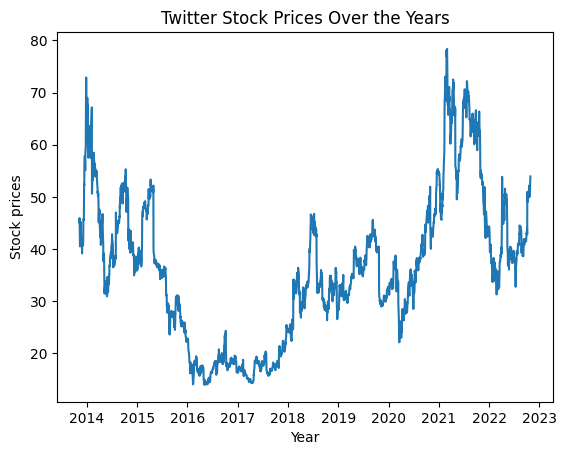

In [ ]:
# 11)	Show the Twitter stock prices over the years  and give a conclusion

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel("/content/TWTR.xlsx")


dates = data["Date"]
Open_price = data["Open"]


plt.plot(dates,Open_price)
plt.xlabel("Year")
plt.ylabel("Stock prices")
plt.title("Twitter Stock Prices Over the Years")
plt.show()




In [ ]:

data = pd.read_excel("/content/TWTR.xlsx")

mean = np.mean(data)
std_dev = np.std(data)

z_scores = [(x - mean) / std_dev for x in data]

for i, z_score in enumerate(z_scores):
  print(f"Z-score for data point {i+1}: {z_score}")


In [ ]:
# 12)	Now compare the close vs date column for Twitter prices

import pandas as pd
import plotly.express as px

data = pd.read_excel("/content/TWTR.xlsx")

fig = px.line(data, x="Date", y="Close",title=" close vs date column for Twitter prices")

fig.show()

In [ ]:
# 13)	Assign buttons to control time periods.  Add the  buttons to analyze the stock prices of Twitter in different time periods
import pandas as pd
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go

data = pd.read_excel("/content/TWTR.xlsx")

data['Date'] = pd.to_datetime(data['Date'])

fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                                     open=data['Open'],
                                     high=data['High'],
                                     low=data['Low'],
                                     close=data['Close'])])

fig.update_layout(title="Twitter Stock Prices Over the Years")


fig.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1m', step='month', stepmode='backward'),
            dict(count=2, label='2m', step='month', stepmode='backward'),
            dict(count=3, label='3m', step='month', stepmode='backward'),
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(count=2, label='2y', step='month', stepmode='backward'),
            dict(count=3, label='3y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)


fig.show()

In [ ]:
# 14.	Give the complete timeline of Twitter in the stock market. (Line Graph)

import pandas as pd
import plotly.express as px

data = pd.read_excel("/content/TWTR.xlsx")

data['Date'] = pd.to_datetime(data['Date'])

fig = px.line(data, x="Date", y="Close", title="Complete Timeline of Twitter in the Stock Market")

fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Closing Price",
    title_font_size=20,
    legend_font_size=12
)

fig.show()

In [ ]:
#15)	Show the quartile, inter-quartile Lower, Median, and Upper Quartile on the given dataset  you can use any three columns for that (Box-Plot)

import pandas as pd
import plotly.express as px

data = pd.read_excel("/content/TWTR.xlsx")

columns = ["Open", "High", "Low"]

fig = px.box(data, y=columns, title="Box Plot of Selected Columns")

fig.show()